In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("bank_notes.csv", header= None)
data.head(10)

,0,1,2,3,4
0,variance,skewness,curtosis,entropy,Target
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0
5,0.32924,-4.4552,4.5718,-0.9888,0
6,4.3684,9.6718,-3.9606,-3.1625,0
7,3.5912,3.0129,0.72888,0.56421,0
8,2.0922,-6.81,8.4636,-0.60216,0
9,3.2032,5.7588,-0.75345,-0.61251,0


In [3]:
data.columns= ['var','skew', 'curt', 'entr', 'auth']

In [4]:
print(data.head(10))

        var      skew      curt      entr    auth
0  variance  skewness  curtosis   entropy  Target
1    3.6216    8.6661   -2.8073  -0.44699       0
2    4.5459    8.1674   -2.4586   -1.4621       0
3     3.866   -2.6383    1.9242   0.10645       0
4    3.4566    9.5228   -4.0112   -3.5944       0
5   0.32924   -4.4552    4.5718   -0.9888       0
6    4.3684    9.6718   -3.9606   -3.1625       0
7    3.5912    3.0129   0.72888   0.56421       0
8    2.0922     -6.81    8.4636  -0.60216       0
9    3.2032    5.7588  -0.75345  -0.61251       0


In [5]:
data.tail()

,var,skew,curt,entr,auth
1368,0.40614,1.3492,-1.4501,-0.55949,1
1369,-1.3887,-4.8773,6.4774,0.34179,1
1370,-3.7503,-13.4586,17.5932,-2.7771,1
1371,-3.5637,-8.3827,12.393,-1.2823,1
1372,-2.5419,-0.65804,2.6842,1.1952,1


In [6]:
data.shape

(1373, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   var     1373 non-null   object
 1   skew    1373 non-null   object
 2   curt    1373 non-null   object
 3   entr    1373 non-null   object
 4   auth    1373 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB


In [8]:
data.describe()

,var,skew,curt,entr,auth
count,1373,1373,1373,1373,1373
unique,1339,1257,1271,1157,3
top,0.5706,-4.4552,1.2421,-0.2957,0
freq,5,6,5,5,762


In [9]:
data= data.iloc[1: , : ]

In [10]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

In [11]:
print(data)

          var      skew     curt      entr auth
1      3.6216    8.6661  -2.8073  -0.44699    0
2      4.5459    8.1674  -2.4586   -1.4621    0
3       3.866   -2.6383   1.9242   0.10645    0
4      3.4566    9.5228  -4.0112   -3.5944    0
5     0.32924   -4.4552   4.5718   -0.9888    0
...       ...       ...      ...       ...  ...
1368  0.40614    1.3492  -1.4501  -0.55949    1
1369  -1.3887   -4.8773   6.4774   0.34179    1
1370  -3.7503  -13.4586  17.5932   -2.7771    1
1371  -3.5637   -8.3827   12.393   -1.2823    1
1372  -2.5419  -0.65804   2.6842    1.1952    1

[1372 rows x 5 columns]


<Axes: ylabel='count'>

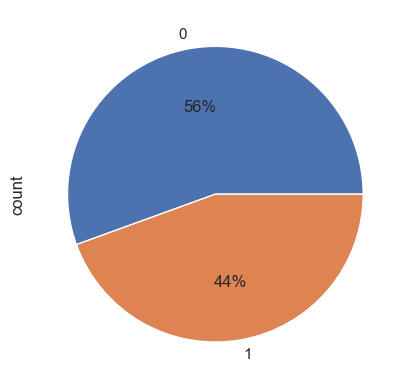

In [12]:
sns.set_theme(style="ticks")

data['auth'].value_counts().plot(kind='pie', autopct='%1.0f%%')

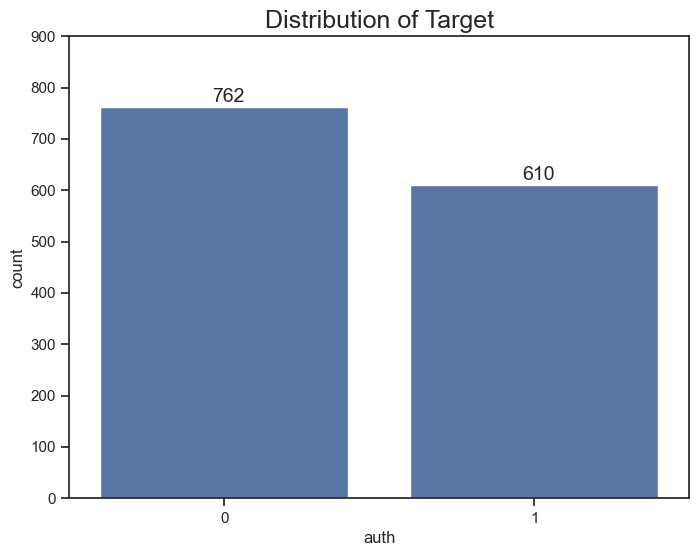

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Target', size= 18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(text=str(target_count.iloc[0]), xy=(-0.04, 10 + target_count.iloc[0]), size=14)
plt.annotate(text=str(target_count.iloc[1]), xy=(0.96, 10 + target_count.iloc[1]), size=14)

plt.ylim(0, 900)
plt.show()

In [17]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

auth
0    610
1    610
Name: count, dtype: int64


C:\Users\harshit\AppData\Local\Temp\ipykernel_24944\2794858152.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nb_to_delete = target_count[0] - target_count[1]


In [18]:
x = data.loc[ : , data.columns != 'auth']
y = data.loc[ : , data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.035, random_state=42)

In [19]:
scaler = StandardScaler() 
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

C:\Users\harshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', random_state=42)

In [21]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=['Pred.Negetive', 'Pred.Positive'],
                       index= ['Act.Negetive', 'Act.Positive'])
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'/n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negetive  Pred.Positive
Act.Negetive             23              1
Act.Positive              0             19
/n Accuracy = 97.67%


In [22]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin = 2)
new_banknote = scaler.transform(new_banknote)
print(f'Prediction : Class {clf.predict(new_banknote)[0]}')
print(f'Probability [0/1] : {clf.predict_proba(new_banknote)[0]}')

Prediction : Class 0
Probability [0/1] : [0.68700685 0.31299315]


C:\Users\harshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(x_train, y_train.values.ravel())



SVC(kernel='linear', probability=True, random_state=42)

In [24]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=['Pred.Negative', 'Pred.Positive'],
                        index=['Act.Negative', 'Act.Positive'])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn + tp) / (tn + fp + fn + tp), 4)

print(conf_mat)
print(f'\nAccuracy = {round(100 * accuracy, 2)}%')


              Pred.Negative  Pred.Positive
Act.Negative             23              1
Act.Positive              0             19

Accuracy = 97.67%


In [25]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scaler.transform(new_banknote)  # Ensure the scaler is fitted to the training data
print(f'Prediction: Class {clf.predict(new_banknote)[0]}')
print(f'Probability [0/1]: {clf.predict_proba(new_banknote)[0]}')

Prediction: Class 1
Probability [0/1]: [0.4388906 0.5611094]


C:\Users\harshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
